In [11]:
import numpy as np
import torch
import gif
import matplotlib.pyplot as plt
import pytorch_lightning as pl 
from pathlib import Path
import yaml
import matplotlib.ticker as tickerd
import matplotlib.colors as colors
from core.utils import load_checkpoint

from matplotlib.tri import Triangulation as triang

import seaborn

seaborn.set_style("darkgrid")

In [19]:
model_checkpoint_path = Path(r'C:\Users\Kevin\OneDrive - UCB-O365\Documents\Research\QuadConv\lightning_logs\lc012723_paper\ignition_grid_012723\ignition_grid\paper\qcae_pool\version_0')
data_path = Path(r'C:\Users\Kevin\OneDrive - UCB-O365\Documents\Research\QuadConv\data\ignition_grid')
model, dataset, points = load_checkpoint(model_checkpoint_path, data_path)

In [12]:
dataset = dataset.transpose(2,3)

In [20]:
save_path = model_checkpoint_path / '..' 

processed_data = model(dataset).detach().numpy()

difference_norm = torch.sqrt((dataset - processed_data)**2)

relative_difference_norm = difference_norm / torch.sqrt((dataset)**2)

In [ ]:
# GRID!


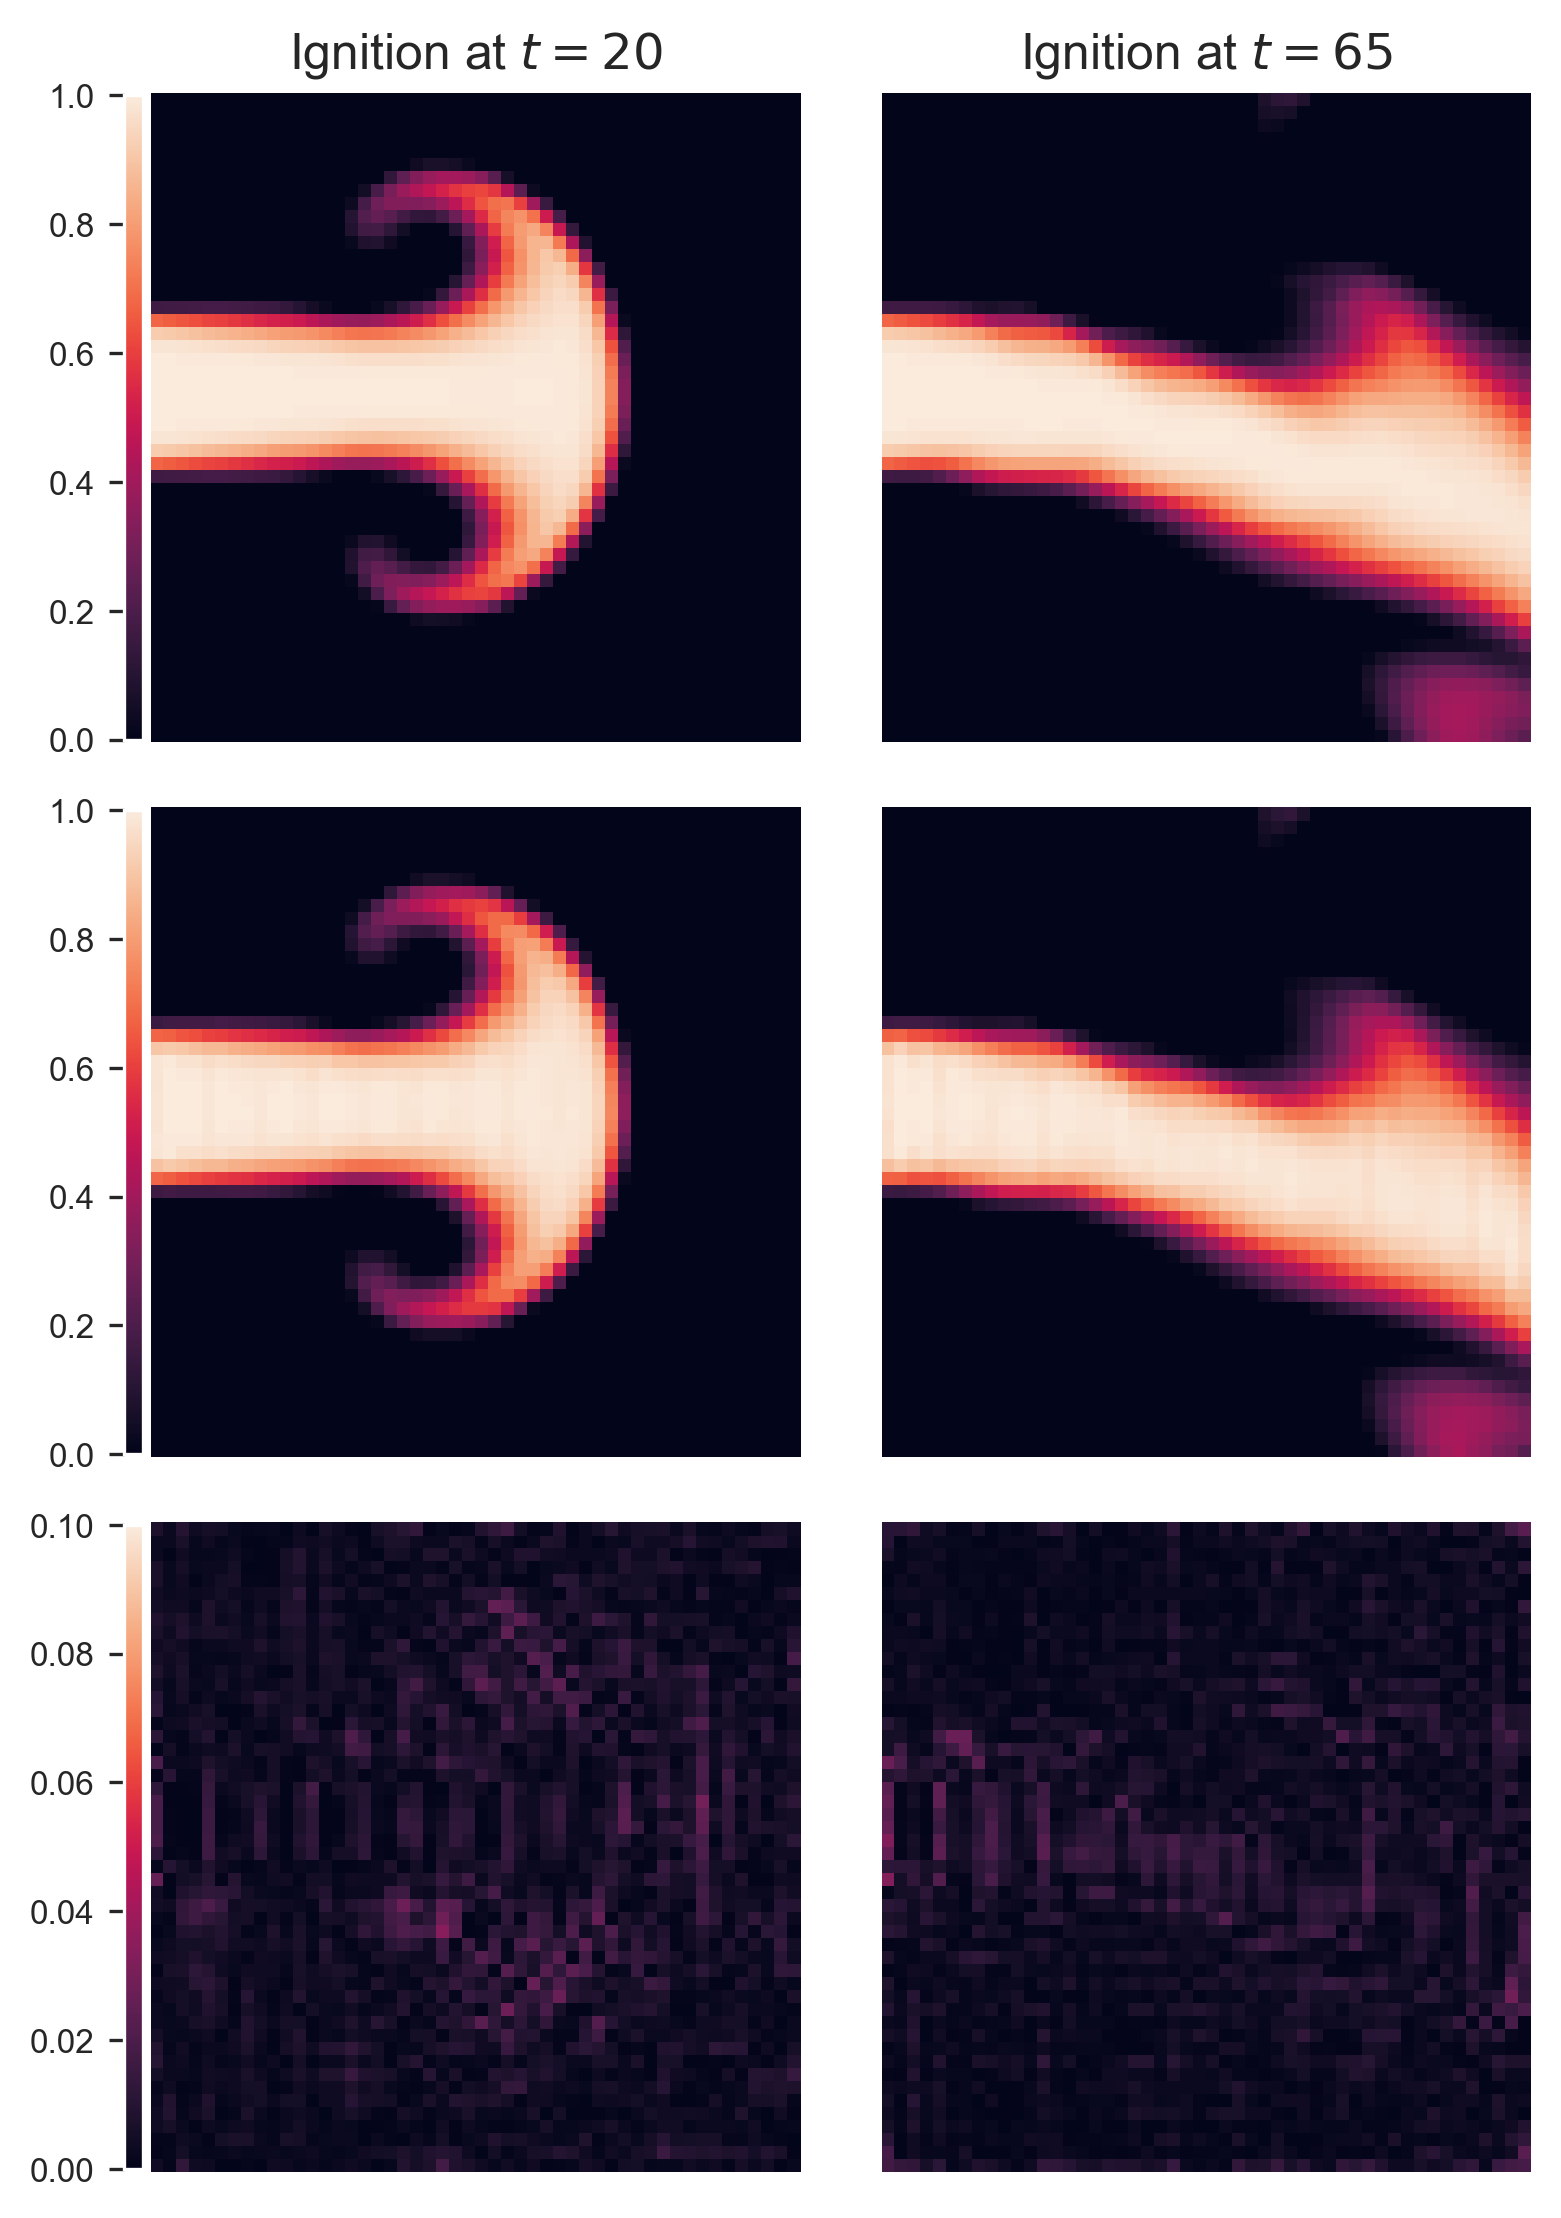

In [6]:
time_steps = [20 , 65]

max_disp = torch.max(dataset)
min_disp = torch.min(dataset)

my_map = seaborn.color_palette(palette='rocket', as_cmap=True)


max_disp = 1
min_disp = 0

x = np.linspace(0,1,50)
y = np.linspace(0,1,50)

grid = np.meshgrid(*(x,y))


fig = plt.figure(figsize=(6,9), dpi=300)

axs = [fig.add_subplot(3,2,i+1) for i in range(6)]


map_it0 = axs[0].pcolor(*grid,dataset[time_steps[0],0,:].reshape(50,50),  vmin=min_disp, vmax=max_disp, cmap=my_map)

map_it2 = axs[2].pcolor(*grid,processed_data[time_steps[0],0,:].reshape(50,50), vmin=min_disp, vmax=max_disp, cmap=my_map)

map_it4 = axs[4].pcolor(*grid, difference_norm[time_steps[0],0,:].reshape(50,50),  vmin=0, vmax=0.1, cmap=my_map)

axs[1].pcolor(*grid, dataset[time_steps[1],0,:].reshape(50,50),  vmin=min_disp, vmax=max_disp, cmap=my_map)

axs[3].pcolor(*grid, processed_data[time_steps[1],0,:].reshape(50,50), vmin=min_disp, vmax=max_disp, cmap=my_map)

axs[5].pcolor(*grid, difference_norm[time_steps[1],0,:].reshape(50,50), vmin=0, vmax=0.1, cmap=my_map)

# Tweak all the axes 
for ax in axs:
    #ax.label_outer()
    ax.set_aspect('equal')
    #ax.margins(x=0.01, y = 0.06)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    ax.set_axis_off()   

plt.subplots_adjust(hspace = 0.1, wspace = 0.1)

axs[1].set_axis_off()   
axs[3].set_axis_off()   
axs[5].set_axis_off()   

# Make colorbars 
bbox = axs[0].get_position()
pos = bbox.bounds
ax_cb = fig.add_axes([pos[0] - 0.015, pos[1] + 0.001 , pos[2]*0.03, pos[3] - 0.002])
plt.colorbar(map_it0, cax=ax_cb)
ax_cb.yaxis.set_ticks_position('left')
ax_cb.tick_params(labelsize = 8)

bbox = axs[2].get_position()
pos = bbox.bounds
ax_cb = fig.add_axes([pos[0]- 0.015, pos[1] + 0.001, pos[2]*0.03, pos[3] - 0.002])
plt.colorbar(map_it2, cax=ax_cb)
ax_cb.yaxis.set_ticks_position('left')
ax_cb.tick_params(labelsize = 8)

bbox = axs[4].get_position()
pos = bbox.bounds
ax_cb = fig.add_axes([pos[0] - 0.015, pos[1] + 0.001, pos[2]*0.03, pos[3] - 0.002])
plt.colorbar(map_it4, cax=ax_cb)
ax_cb.yaxis.set_ticks_position('left')
ax_cb.tick_params(labelsize = 8)



axs[0].set_title(r'Ignition at $t=20$')

axs[1].set_title(r'Ignition at $t=65$')


axs[0].yaxis.set_label_coords(-0.25,0.5)
axs[0].set_ylabel('Original')
axs[2].yaxis.set_label_coords(-0.25,0.5)
axs[2].set_ylabel('Reconstructed')
axs[4].yaxis.set_label_coords(-0.25,0.5)
axs[4].set_ylabel('Error')


fig.savefig(save_path / 'cnn_ignition_grid_viz_results.png', format='png', bbox_inches='tight', dpi=300, transparent=True)


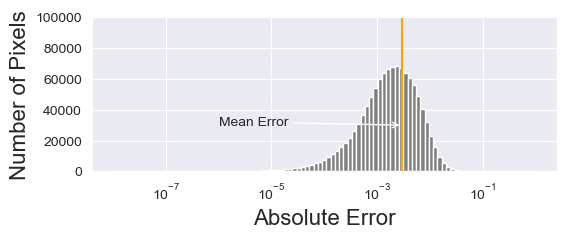

In [7]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(1,1,1)


ax.hist(difference_norm.flatten(),bins=np.logspace(np.log10(1e-8),np.log10(1.0), 100), log=False, color='grey')
ax.set_xscale("log")
plt.ylabel('Number of Pixels', fontsize=16)
plt.xlabel('Absolute Error', fontsize=16)

ax.axvline(x = torch.mean(difference_norm), color = 'orange', label = 'Mean Error')
ax.annotate('Mean Error' , (torch.mean(difference_norm),3e4), xytext=(1e-6, 3e4), textcoords='data', arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))

plt.ylim(0,100000)
fig.savefig(save_path / 'cnn_ignition_grid_abs_error_histogram.png', format='png', dpi=300, transparent=True, bbox_inches='tight')


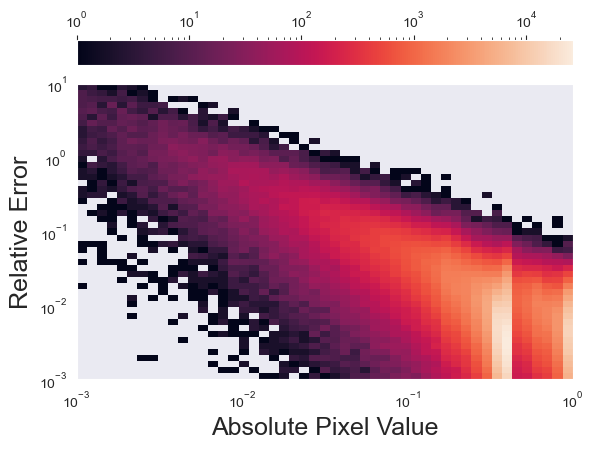

In [6]:
xbin = np.logspace(np.log10(1e-3),np.log10(1.), 50)
ybin = np.logspace(np.log10(1e-3),np.log10(10), 50)

plt.hist2d( torch.abs(dataset.flatten()).numpy(), relative_difference_norm.flatten().numpy(), bins=[xbin,ybin], norm = colors.LogNorm())

plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.colorbar(location='top')
plt.xlabel('Absolute Pixel Value', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)

plt.savefig(save_path / 'cnn_ignition_grid_abs_rel_histogram.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

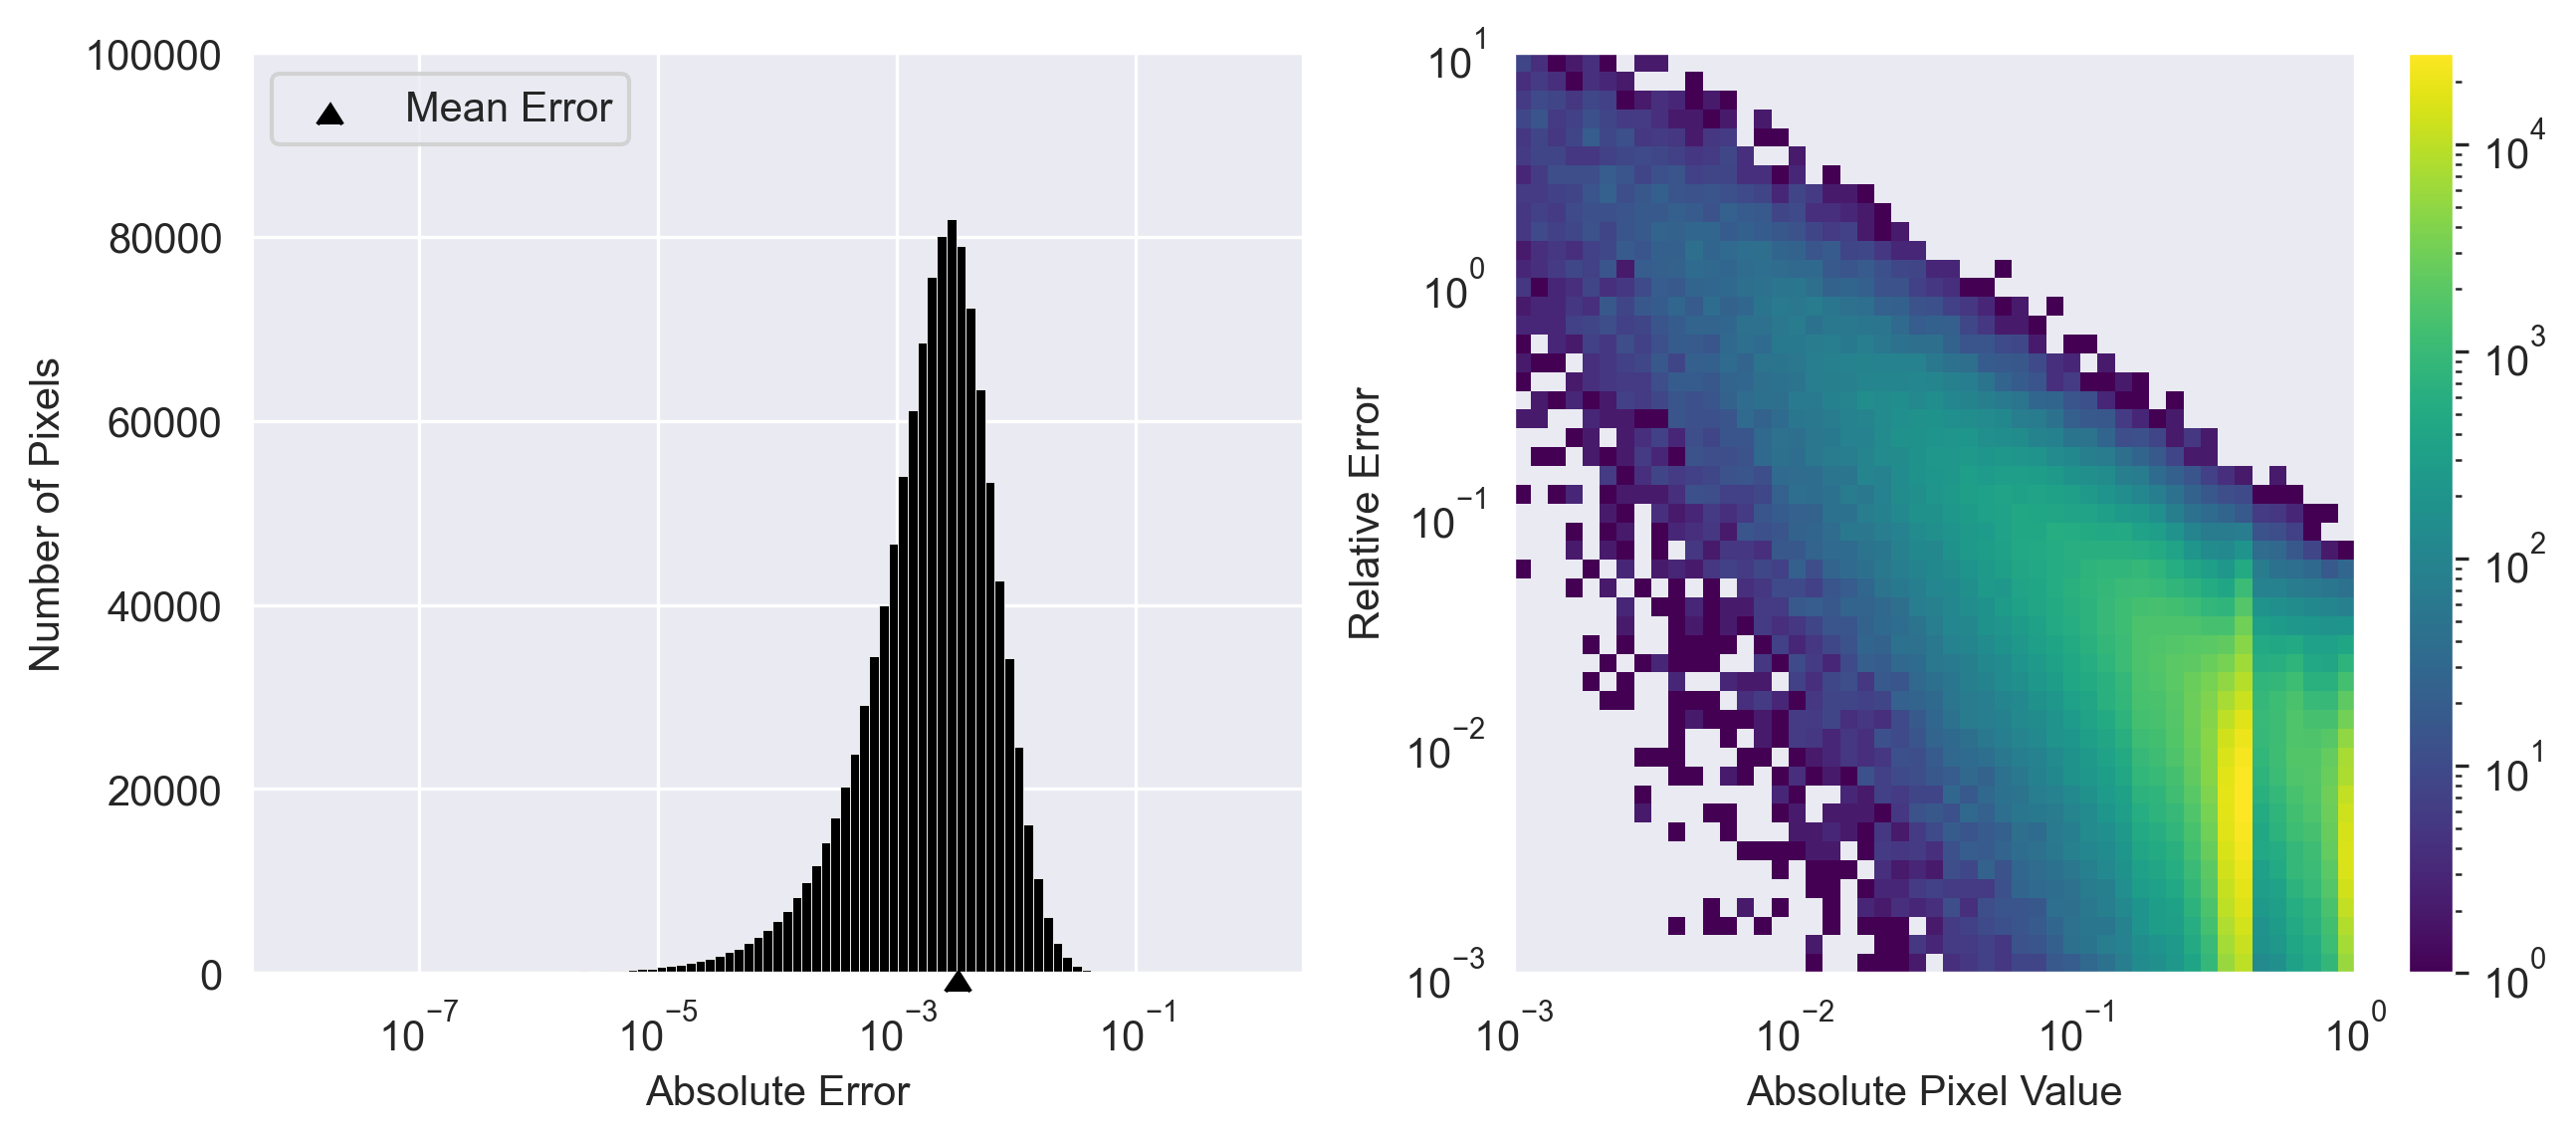

In [21]:
# subplot version of histograms

plt.subplots_adjust(hspace = 0.1, wspace = 0.01)

fig = plt.figure(figsize=(10,4), dpi=300)

haxs = [fig.add_subplot(1,2,i+1) for i in range(2)]

haxs[0].hist(difference_norm.flatten(),bins=np.logspace(np.log10(1e-8),np.log10(1.0), 100), log=False, color='black', linewidth=0.2)
haxs[0].set_xscale("log")
haxs[0].set(xlabel="Absolute Error",ylabel="Number of Pixels")
haxs[0].set_ylim(0,100000)

mean_mark = haxs[0].plot(torch.mean(difference_norm), 0, color = 'black', marker=6,label = 'Mean Error', zorder=10, clip_on=False, linestyle="None")

haxs[0].legend(loc='upper left')

hist_map = seaborn.color_palette(palette='viridis', as_cmap=True)

xbin = np.logspace(np.log10(1e-3),np.log10(1.), 50)
ybin = np.logspace(np.log10(1e-3),np.log10(10), 50)

h2 = haxs[1].hist2d( torch.abs(dataset.flatten()).numpy(), relative_difference_norm.flatten().numpy(), bins=[xbin,ybin], norm = colors.LogNorm(), cmap=hist_map)

haxs[1].set_xscale("log")
haxs[1].set_yscale("log")
haxs[1].set(xlabel="Absolute Pixel Value",ylabel="Relative Error")

fig.colorbar(h2[3], ax=haxs[1], location='right')

plt.savefig(save_path / 'error_analysis_ignition_grid.png', format='png', bbox_inches='tight', dpi=300)

In [8]:
# print relevant numbers

print(sum(p.numel() for p in model.parameters() if p.requires_grad))


#compute average relative reconstruction error
dim = tuple([i for i in range(1, 3)])

n = torch.sqrt(torch.sum((dataset-processed_data)**2, dim=dim))
d = torch.sqrt(torch.sum((dataset)**2, dim=dim))

print(dim)
print(torch.mean(n/d))

print(dataset.shape)
print(n.shape)

1037810
(1, 2)
tensor(0.0084)
torch.Size([450, 1, 2500])
torch.Size([450])


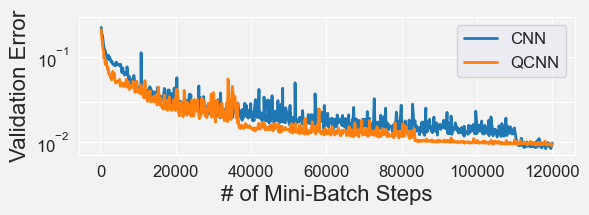

In [10]:
tensorboard_path = Path(r'C:\Users\Kevin\OneDrive - UCB-O365\Documents\Research\QuadConv\lightning_logs\ignition_grid_paper\paper')
import json
json_files = tensorboard_path.glob('*.json')

fig = plt.figure()
ax = plt.axes()
fig.set_facecolor((0.95,0.95,0.95))
ax.set_facecolor((0.95,0.95,0.95))
#ax.set_aspect(1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)

legend = ['QCNN', 'CNN']

for f in json_files:
    with f.open() as fp:
        series = json.load(fp)

        series_x = [series[i][1] for i in range(len(series))]
        series_y = [series[i][2] for i in range(len(series))]

    ax.plot(series_x, series_y, linewidth=2)
    


ax.set_yscale('log')
plt.yticks([3e-1,1e-1,3e-2,1e-2])
ax.legend(['CNN', 'QCNN'], prop={'size': 12})
plt.ylabel('Validation Error', fontsize=16)
plt.xlabel('# of Mini-Batch Steps', fontsize=16)

ratio = 0.05
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)



plt.savefig(tensorboard_path / 'training_comparison.png', dpi = 300, bbox_inches='tight', transparent=True)